In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
import cvxpy as cvx
from scipy import stats, misc

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

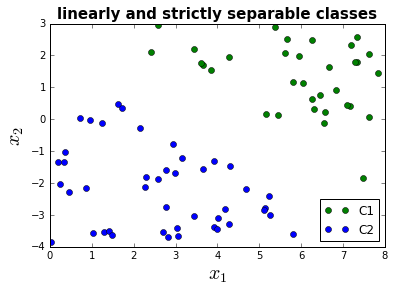

In [17]:
# perceptron

#training data gerneration

x1 = 8*np.random.rand(100, 1)
x2 = 7*np.random.rand(100, 1) - 4

g0 = 0.8*x1 + x2 - 3
g1 = g0 - 1
g2 = g0 + 1

C1 = np.where(g1 >= 0)[0]
C2 = np.where(g2 < 0)[0]

plt.plot(x1[C1], x2[C1], 'go', x1[C2], x2[C2], 'bo')
plt.xlim([0,8])
plt.title('linearly and strictly separable classes', fontweight = 'bold', fontsize = 15)
plt.xlabel('$x_1$', fontsize = 20)
plt.ylabel('$x_2$', fontsize = 20)
plt.legend(('C1','C2'), loc = 4)
plt.show()

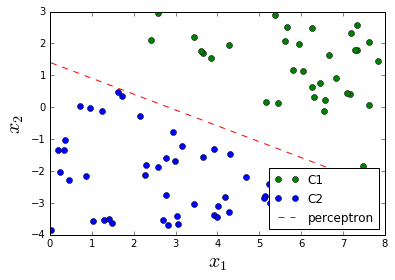

In [18]:
X1 = np.concatenate((x1[C1], x2[C1]), axis = 1).transpose()
X2 = np.concatenate((x1[C2], x2[C2]), axis = 1).transpose()


X = np.concatenate((X1, X2), axis = 1)

y1 = np.ones((1, np.shape(C1)[0]))
y2 = -np.ones((1, np.shape(C2)[0]))

y = np.concatenate((y1, y2), axis = 1)
# y shape is (1, 74)
X3 = np.concatenate((np.ones((1, np.shape(X)[1])), X), axis = 0)

#classification via perceptron algorithm

w = np.ones((1, 3)) # w initialization, shape (1, 3)
iter = np.shape(X3)[1]
for k in range(0, iter):
    for i in range(0, np.shape(X3)[1]):
        yhat = np.array(np.sign((w).dot(X3[:, i])))
        if y[0, i] != yhat:
            w = w + y[:, i]*X3[:, i]
w = np.transpose(w) 

# w shape is (3, 1)
# to drqw decision boundary
t_min = np.min(X3[1, :])
t_max = np.max(X3[1, :])
t = np.linspace(t_min, t_max, 100)
p = - w[1]/w[2]*t - w[0]/w[2]

plt.plot(x1[C1], x2[C1], 'go', x1[C2], x2[C2], 'bo', t, p, '--r')
plt.xlim([0,8])
plt.xlabel('$x_1$', fontsize = 20)
plt.ylabel('$x_2$', fontsize = 20)
plt.legend(('C1','C2', 'perceptron'), loc = 4)
plt.show()